# Strategy and Result

##  Basic Invesment Strategy

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
train_sp = pd.read_parquet('../data/golden/sp500_train.parquet')
test_sp = pd.read_parquet('../data/golden/sp500_test.parquet')

train_csi = pd.read_parquet('../data/golden/csi300_train.parquet')
test_csi = pd.read_parquet('../data/golden/csi300_test.parquet')

In [3]:
# @TODO : stock list vao trong hoac sau khoang thoi gian lay tap du lieu -> nan.
train_sp = train_sp.dropna()
test_sp = test_sp.dropna()

In [4]:
X_train = train_sp.drop(columns=['GB'])
y_train = train_sp['GB']

X_test = test_sp.drop(columns=['GB'])
y_test = test_sp['GB']

In [6]:
X_train.head()

,Sticker,Date,return_1,return_2,return_3,return_4,return_5,return_6,return_7,return_8,...,return_60,return_80,return_100,return_120,return_140,return_160,return_180,return_200,return_220,return_240
1256,A,2017-01-03,-0.001753,-0.000614,-0.017589,-0.010998,-0.006049,-0.007560,-0.011211,0.005765,...,-0.030924,-0.027692,-0.034659,-0.015572,0.022398,0.077572,0.122613,0.172284,0.238479,0.236153
1257,A,2017-01-04,0.020413,0.018624,0.019786,0.002464,0.009190,0.014240,0.012698,0.008973,...,-0.014279,-0.005946,-0.016198,0.007120,0.043500,0.091374,0.134437,0.169426,0.255321,0.262402
1258,A,2017-01-05,0.013121,0.033801,0.031989,0.033166,0.015617,0.022432,0.027548,0.025985,...,-0.003032,0.055118,-0.016129,0.011831,0.056486,0.069094,0.146823,0.200905,0.252062,0.253709
1259,A,2017-01-06,-0.011889,0.001076,0.021510,0.019720,0.020883,0.003543,0.010276,0.015331,...,-0.021288,0.022748,-0.028028,0.002587,0.034032,0.058529,0.129914,0.179784,0.265800,0.250991
1260,A,2017-01-09,0.031156,0.018896,0.032265,0.053336,0.051490,0.052689,0.034809,0.041752,...,0.053380,0.074577,-0.003953,0.030951,0.066482,0.085629,0.153724,0.229178,0.294441,0.293406


# Model Training

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from keras.utils import to_categorical
from xgboost import XGBClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

In [ ]:
def train_dnn(X_train, y_train):
    # Ensure TensorFlow uses the GPU if available
    physical_devices = tf.config.list_physical_devices('GPU')
    if physical_devices:
        try:
            tf.config.experimental.set_memory_growth(physical_devices[0], True)
            tf.config.set_visible_devices(physical_devices[0], 'GPU')
            print("Using GPU:", physical_devices[0])
        except RuntimeError as e:
            print(e)
    else:
        print("No GPU found, using CPU instead.")

    model = Sequential()
    model.add(Dense(31, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(31, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

    model.fit(X_train, y_train, epochs=400, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

    return model


def train_random_forest(X_train, y_train):
    model = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    return model

def train_xgboost(X_train, y_train):
    model = XGBClassifier(n_estimators=1000, max_depth=10, learning_rate=0.03, random_state=42, tree_method='hist')
    model.fit(X_train, y_train)
    return model

def train_svm(X_train, y_train):
    model = SVC(C=3000, gamma=0.8, probability=True)
    model.fit(X_train, y_train)
    return model

In [ ]:
dnn_model = train_dnn(X_train.drop(columns=['Sticker', 'Date']), y_train)
raf_model = train_random_forest(X_train.drop(columns=['Sticker', 'Date']), y_train)
xgb_model = train_xgboost(X_train.drop(columns=['Sticker', 'Date']), y_train)
# svm_model = train_svm(X_train, y_train)

No GPU found, using CPU instead.
Epoch 1/400
9103/9103 [==============================] - 27s 3ms/step - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.5055
Epoch 2/400
9103/9103 [==============================] - 26s 3ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.5005
Epoch 3/400
9103/9103 [==============================] - 25s 3ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6931 - val_accuracy: 0.5074
Epoch 4/400
9103/9103 [==============================] - 25s 3ms/step - loss: 0.6931 - accuracy: 0.5029 - val_loss: 0.6930 - val_accuracy: 0.5044
Epoch 5/400
9103/9103 [==============================] - 29s 3ms/step - loss: 0.6930 - accuracy: 0.5057 - val_loss: 0.6931 - val_accuracy: 0.5035
Epoch 6/400
9103/9103 [==============================] - 24s 3ms/step - loss: 0.6930 - accuracy: 0.5059 - val_loss: 0.6929 - val_accuracy: 0.5075
Epoch 7/400
9103/9103 [==============================] - 25s 3ms/step - loss: 0.6930 - accu

In [ ]:
import pickle

with open('./drive/MyDrive/WQU/690/files/dnn_model.pkl', 'wb') as f:
    pickle.dump(dnn_model, f)

with open('./drive/MyDrive/WQU/690/files/raf_model.pkl', 'wb') as f:
    pickle.dump(raf_model, f)

with open('./drive/MyDrive/WQU/690/files/xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

# Inference

In [ ]:
import pickle
import pandas as pd
import numpy as np


In [ ]:
outsample = pd.read_parquet('./drive/MyDrive/WQU/690/raw/sp500.parquet')['Adj Close']

daily_returns = outsample.pct_change() # TODO check again
daily_returns = daily_returns[(daily_returns.index.year >= m) & (daily_returns.index.year < e)]

In [ ]:
class Inference():
    def __init__(self):
        with open('./drive/MyDrive/WQU/690/files/dnn_model.pkl', 'rb') as f:
            self.dnn_model = pickle.load(f)

        with open('./drive/MyDrive/WQU/690/files/xgb_model.pkl', 'rb') as f:
            self.xgb_model = pickle.load(f)

        with open('./drive/MyDrive/WQU/690/files/raf_model.pkl', 'rb') as f:
            self.raf_model = pickle.load(f)

        self.models = {
            'DNN': self.dnn_model,
            'RAF': self.raf_model,
            'XGB': self.xgb_model
        }

    def predict_proba(self, frame):
        r = {}
        tmp = frame.drop(columns=['Sticker'])
        for name, model in self.models.items():
            if name == 'DNN':
                r[name] = model.predict(tmp)
            else:
                r[name] = model.predict_proba(tmp)[:, 1]
        return r

    def select_bottom_stocks(self, dataframe, n):
        bottom_stocks = dataframe.apply(lambda row: row.nsmallest(n).index.tolist(), axis=1)
        return bottom_stocks

    def select_top_stocks(self, dataframe, n):
        top_stocks = dataframe.apply(lambda row: row.nlargest(n).index.tolist(), axis=1)
        return top_stocks

    def trigger(self, frame):
        r = self.predict_proba(frame)
        rr = frame.copy()
        for name, prediction in r.items():
            rr[name] = prediction

        return {
            name: rr.pivot_table(columns='Sticker', index='Date', values=name) for name in r.keys()
        }

    def run(self, frame, daily_returns, n):
        t = {}
        full = self.trigger(frame)
        bottom_ = {k: self.select_bottom_stocks(v, n) for k, v in full.items()}
        top_    = {k: self.select_top_stocks(v, n) for k, v in full.items()}
        for name in self.models.keys():
            daily_portfolio_return = []
            transaction_cost = 0.0005

            for date in daily_returns.index[:-1]:
                top_stocks = top_[name].loc[date]
                bottom_stocks = bottom_[name].loc[date]
                long_returns = daily_returns.loc[date, top_stocks].mean()
                short_returns = daily_returns.loc[date, bottom_stocks].mean()

                portfolio_return = long_returns - short_returns - transaction_cost
                daily_portfolio_return.append(portfolio_return)
            t[name] = np.mean(daily_portfolio_return[1:-1])
        return t

In [ ]:
tmp = {}

for n in (10, 20, 50, 100):
    s = Inference()
    tmp[n] = s.run(X_test.set_index('Date'), daily_returns, n)

3882/3882 [==============================] - 5s 1ms/step


In [ ]:

pd.DataFrame(tmp) * 100

,10,20,50,100
DNN,-0.143004,-0.162448,-0.139042,-0.146635
RAF,0.258072,0.259036,0.164875,0.133545
XGB,0.279044,0.281239,0.191075,0.090952


In [ ]:
np.prod(1 + 0.258072) - 1

0.2580720000000001

In [ ]:
3

3

Train: 17-20
Test: 20-21
Result: 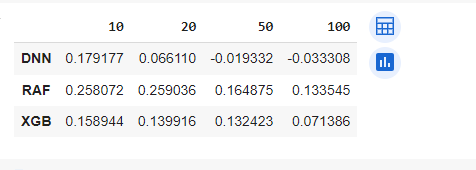

Train: 16-19
Test: 19-20
Result


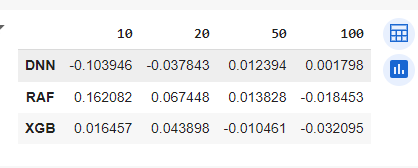

Train 15-18
Test 19
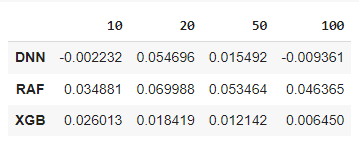

In [ ]:
import numpy as np
import pandas as pd
import pickle

class Inference():
    def __init__(self):
        with open('./drive/MyDrive/WQU/690/files/dnn_model.pkl', 'rb') as f:
            self.dnn_model = pickle.load(f)

        with open('./drive/MyDrive/WQU/690/files/xgb_model.pkl', 'rb') as f:
            self.xgb_model = pickle.load(f)

        with open('./drive/MyDrive/WQU/690/files/raf_model.pkl', 'rb') as f:
            self.raf_model = pickle.load(f)

        self.models = {
            'DNN': self.dnn_model,
            'RAF': self.raf_model,
            'XGB': self.xgb_model
        }

    def predict_proba(self, frame):
        r = {}
        tmp = frame.drop(columns=['Sticker'])
        for name, model in self.models.items():
            if name == 'DNN':
                r[name] = model.predict(tmp)
            else:
                r[name] = model.predict_proba(tmp)[:, 1]
        return r

    def select_bottom_stocks(self, dataframe, n):
        bottom_stocks = dataframe.apply(lambda row: row.nsmallest(n).index.tolist(), axis=1)
        return bottom_stocks

    def select_top_stocks(self, dataframe, n):
        top_stocks = dataframe.apply(lambda row: row.nlargest(n).index.tolist(), axis=1)
        return top_stocks

    def trigger(self, frame):
        r = self.predict_proba(frame)
        rr = frame.copy()
        for name, prediction in r.items():
            rr[name] = prediction

        return {
            name: rr.pivot_table(columns='Sticker', index='Date', values=name) for name in r.keys()
        }

    def calculate_metrics(self, daily_portfolio_return):
        daily_portfolio_return = np.array(daily_portfolio_return)

        # Calculate Annualized Return
        annualized_return = np.prod(1 + daily_portfolio_return) ** (252 / len(daily_portfolio_return)) - 1

        # Calculate Standard Deviation
        std_dev = np.std(daily_portfolio_return) * np.sqrt(252)

        # Calculate Sharpe Ratio
        sharpe_ratio = annualized_return / std_dev

        return annualized_return, std_dev, sharpe_ratio

    def run(self, frame, daily_returns, n_values):
        results = {}
        full = self.trigger(frame)
        for n in n_values:
            bottom_ = {k: self.select_bottom_stocks(v, n) for k, v in full.items()}
            top_ = {k: self.select_top_stocks(v, n) for k, v in full.items()}
            for name in self.models.keys():
                daily_portfolio_return = []
                transaction_cost = 0.0005

                for date in daily_returns.index[:-1]:
                    top_stocks = top_[name].loc[date]
                    bottom_stocks = bottom_[name].loc[date]
                    long_returns = daily_returns.loc[date, top_stocks].mean()
                    short_returns = daily_returns.loc[date, bottom_stocks].mean()

                    portfolio_return = long_returns - short_returns - transaction_cost
                    daily_portfolio_return.append(portfolio_return)

                ann_return, std_dev, sharpe_ratio = self.calculate_metrics(daily_portfolio_return[1:])
                if name not in results:
                    results[name] = {}
                results[name][n] = {
                    'Annualized Return': ann_return,
                    'Standard Deviation': std_dev,
                    'Sharpe Ratio': sharpe_ratio
                }
        return results


In [ ]:
inference = Inference()
results = inference.run(X_test.set_index('Date'), daily_returns, [10, 20, 50])

3882/3882 [==============================] - 7s 2ms/step


In [ ]:
pd.DataFrame(results['DNN']).T

,Annualized Return,Standard Deviation,Sharpe Ratio
10,-0.370660,0.470367,-0.788022
20,-0.389159,0.427585,-0.910134
50,-0.339165,0.363490,-0.933079


In [ ]:
pd.DataFrame(results['RAF']).T

,Annualized Return,Standard Deviation,Sharpe Ratio
10,0.753491,0.428141,1.759911
20,0.826845,0.328765,2.515002
50,0.463815,0.268274,1.728889


In [ ]:
pd.DataFrame(results['XGB']).T

,Annualized Return,Standard Deviation,Sharpe Ratio
10,0.886937,0.320111,2.770722
20,0.928971,0.273642,3.394837
50,0.578200,0.203521,2.840992


# **4.2**

In [ ]:
import numpy as np
import pandas as pd
import pickle

class Inference():
    def __init__(self):
        with open('./drive/MyDrive/WQU/690/files/dnn_model.pkl', 'rb') as f:
            self.dnn_model = pickle.load(f)

        with open('./drive/MyDrive/WQU/690/files/xgb_model.pkl', 'rb') as f:
            self.xgb_model = pickle.load(f)

        with open('./drive/MyDrive/WQU/690/files/raf_model.pkl', 'rb') as f:
            self.raf_model = pickle.load(f)

        self.models = {
            'DNN': self.dnn_model,
            'RAF': self.raf_model,
            'XGB': self.xgb_model
        }

    def predict_proba(self, frame):
        r = {}
        tmp = frame.drop(columns=['Sticker'])
        for name, model in self.models.items():
            if name == 'DNN':
                r[name] = model.predict(tmp)
            else:
                r[name] = model.predict_proba(tmp)[:, 1]
        return r

    def select_bottom_stocks(self, dataframe, n):
        bottom_stocks = dataframe.apply(lambda row: row.nsmallest(n).index.tolist(), axis=1)
        return bottom_stocks

    def select_top_stocks(self, dataframe, n):
        top_stocks = dataframe.apply(lambda row: row.nlargest(n).index.tolist(), axis=1)
        return top_stocks

    def trigger(self, frame):
        r = self.predict_proba(frame)
        rr = frame.copy()
        for name, prediction in r.items():
            rr[name] = prediction

        return {
            name: rr.pivot_table(columns='Sticker', index='Date', values=name) for name in r.keys()
        }

    def calculate_metrics(self, daily_portfolio_return):
        daily_portfolio_return = np.array(daily_portfolio_return)

        # Calculate Annualized Return
        annualized_return = np.prod(1 + daily_portfolio_return) ** (252 / len(daily_portfolio_return)) - 1

        # Calculate Standard Deviation
        std_dev = np.std(daily_portfolio_return) * np.sqrt(252)

        # Calculate Sharpe Ratio
        sharpe_ratio = annualized_return / std_dev

        return annualized_return, std_dev, sharpe_ratio

    def run(self, frame, daily_returns, n_values):
        results = {}
        full = self.trigger(frame)
        for n in n_values:
            bottom_ = {k: self.select_bottom_stocks(v, n) for k, v in full.items()}
            top_ = {k: self.select_top_stocks(v, n) for k, v in full.items()}
            for name in self.models.keys():
                for strategy in ['normal', 'day']:
                    daily_portfolio_return = []
                    transaction_cost = 0.0005

                    for date in daily_returns.index[:-1]:
                        if strategy == 'normal':
                            next_date = daily_returns.index[daily_returns.index.get_loc(date) + 1]
                            top_stocks = top_[name].loc[date]
                            bottom_stocks = bottom_[name].loc[date]
                            long_returns = daily_returns.loc[next_date, top_stocks].mean()
                            short_returns = daily_returns.loc[next_date, bottom_stocks].mean()
                        elif strategy == 'day':
                            top_stocks = top_[name].loc[date]
                            bottom_stocks = bottom_[name].loc[date]
                            open_prices = daily_returns.loc[date, top_stocks].mean()
                            close_prices = daily_returns.loc[date, bottom_stocks].mean()
                            long_returns = daily_returns.loc[date, top_stocks].mean()
                            short_returns = daily_returns.loc[date, bottom_stocks].mean()

                        portfolio_return = long_returns - short_returns - transaction_cost
                        daily_portfolio_return.append(portfolio_return)

                    ann_return, std_dev, sharpe_ratio = self.calculate_metrics(daily_portfolio_return[1:])
                    if name not in results:
                        results[name] = {}
                    if n not in results[name]:
                        results[name][n] = {}
                    results[name][n][strategy] = {
                        'Annualized Return': ann_return,
                        'Standard Deviation': std_dev,
                        'Sharpe Ratio': sharpe_ratio
                    }
        return results


inference = Inference()
results = inference.run(X_test.set_index('Date'), daily_returns, [10, 20, 50])
results

3882/3882 [==============================] - 7s 2ms/step


{'DNN': {10: {'normal': {'Annualized Return': -0.39991460817973856,
    'Standard Deviation': 0.48243350077062264,
    'Sharpe Ratio': -0.8289528143069019},
   'day': {'Annualized Return': -0.3706595511490143,
    'Standard Deviation': 0.4703672356268945,
    'Sharpe Ratio': -0.788021620287833}},
  20: {'normal': {'Annualized Return': -0.27004633464237615,
    'Standard Deviation': 0.4374545969150164,
    'Sharpe Ratio': -0.6173128286838819},
   'day': {'Annualized Return': -0.38915922442848816,
    'Standard Deviation': 0.4275846277654373,
    'Sharpe Ratio': -0.9101338054696662}},
  50: {'normal': {'Annualized Return': -0.15907000858165454,
    'Standard Deviation': 0.3662586588525992,
    'Sharpe Ratio': -0.4343105746086191},
   'day': {'Annualized Return': -0.33916511642795644,
    'Standard Deviation': 0.36349024225622895,
    'Sharpe Ratio': -0.9330790128579974}}},
 'RAF': {10: {'normal': {'Annualized Return': 1.4970063842170949,
    'Standard Deviation': 0.37290992285781244,
   